In [1]:
import pandas as pd

# Specify the file path of the TSV file
file_path = '/home/dotronghiep/Documents/Uni/Year3_Term2/NLP/smsspamcollection.tsv'

# Read the TSV file into a pandas DataFrame
data = pd.read_csv(file_path, delimiter='\t').dropna()

data.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [2]:
X_raw = data.iloc[:,1].values
y_raw = data.iloc[:,0].values
X_raw, y_raw

(array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
        'Ok lar... Joking wif u oni...',
        "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
        ..., 'Pity, * was in mood for that. So...any other suggestions?',
        "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
        'Rofl. Its true to its name'], dtype=object),
 array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object))

In [3]:
import re 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import words
nltk.download('words')
english_words = set(words.words())
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/dotronghiep/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/dotronghiep/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /home/dotronghiep/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [4]:
def preprocess(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    
    # Remove non-alphabetic characters and stopwords
    tokens = [token for token in tokens if token.isalpha() and token not in stopwords.words('english')]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token, pos='v') for token in tokens]    
    
    # Remove words not in English
    english_words = set(nltk.corpus.words.words())
    tokens = [token for token in tokens if token in english_words]
    
    return tokens

In [5]:
from tqdm import tqdm

X = [None] * len(X_raw)
for i in tqdm(range(len(X_raw))):
    X[i] = preprocess(X_raw[i])

X

  0%|          | 0/5572 [00:00<?, ?it/s]

100%|██████████| 5572/5572 [05:12<00:00, 17.83it/s]


[['go',
  'point',
  'crazy',
  'available',
  'n',
  'great',
  'world',
  'la',
  'e',
  'buffet',
  'cine',
  'get',
  'wat'],
 ['lar', 'joke', 'u'],
 ['free',
  'entry',
  'win',
  'fa',
  'cup',
  'final',
  'may',
  'text',
  'fa',
  'receive',
  'entry',
  'question',
  'rate',
  'c',
  'apply'],
 ['u', 'dun', 'say', 'early', 'u', 'c', 'already', 'say'],
 ['think', 'go', 'live', 'around', 'though'],
 ['hey', 'darling', 'week', 'word', 'back', 'like', 'fun', 'still', 'send'],
 ['even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent'],
 ['per', 'request', 'set', 'press', 'copy'],
 ['winner',
  'value',
  'network',
  'customer',
  'select',
  'prize',
  'reward',
  'claim',
  'call',
  'claim',
  'code',
  'valid'],
 ['mobile',
  'u',
  'r',
  'entitle',
  'update',
  'latest',
  'colour',
  'camera',
  'free',
  'call',
  'mobile',
  'update',
  'free'],
 ['gon',
  'na',
  'home',
  'soon',
  'want',
  'talk',
  'stuff',
  'tonight',
  'k',
  'cry',
  'enough',
  'to

In [6]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the y_raw array
y = label_encoder.fit_transform(y_raw)

y_raw, y

(array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object),
 array([0, 0, 1, ..., 0, 0, 0]))

In [7]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the lengths of the training and testing sets
print("Training set length:", len(X_train))
print("Testing set length:", len(X_test))


Training set length: 4457
Testing set length: 1115


In [8]:
# Count the occurrences of each word in the positive and negative classes
positive_word_counts = {}
negative_word_counts = {}
vocab = []
positive_counts = 0
negative_counts = 0

for i in range(len(X_train)):
    for word in X_train[i]:
        if y_train[i] == 1:
            positive_word_counts[word] = positive_word_counts.get(word, 0) + 1
            positive_counts += 1
        else:
            negative_word_counts[word] = negative_word_counts.get(word, 0) + 1
            negative_counts += 1
        vocab.append(word)

vocab = set(vocab)

# Calculate the total count of words in the positive and negative classes
total_positive_words = sum(positive_word_counts.values())
total_negative_words = sum(negative_word_counts.values())

# Calculate the probabilities for each word
word_probabilities = {}

for word in vocab:
    positive_probability = (positive_word_counts.get(word, 0) + 1) / (total_positive_words + len(vocab))
    negative_probability = (negative_word_counts.get(word, 0) + 1) / (total_negative_words + len(vocab))
    word_probabilities[word] = [positive_probability, negative_probability]

p_positive = positive_counts / len(X_train)
p_negative = negative_counts / len(X_train)

word_probabilities


{'office': [0.00021992522542335605, 0.0008859684742884566],
 'dresser': [0.00010996261271167803, 0.00014766141238140942],
 'sac': [0.00010996261271167803, 7.383070619070471e-05],
 'juicy': [0.00010996261271167803, 0.00011074605928605707],
 'side': [0.00010996261271167803, 0.0004798995902395806],
 'ill': [0.00021992522542335605, 0.00125512200524198],
 'weekend': [0.0014295139652518143, 0.0007752224150023995],
 'predict': [0.00010996261271167803, 0.00011074605928605707],
 'know': [0.002419177479656917, 0.007789139503119347],
 'lux': [0.0003298878381350341, 3.6915353095352356e-05],
 'drunken': [0.00010996261271167803, 0.00011074605928605707],
 'imp': [0.00010996261271167803, 7.383070619070471e-05],
 'matra': [0.00010996261271167803, 7.383070619070471e-05],
 'beth': [0.00010996261271167803, 7.383070619070471e-05],
 'praise': [0.00010996261271167803, 7.383070619070471e-05],
 'trauma': [0.00010996261271167803, 7.383070619070471e-05],
 'spend': [0.00010996261271167803, 0.0007383070619070471],

In [9]:
def remove_unkown_word(text):
    for i in text:
        if i not in vocab:
            text.remove(i)
    return text

In [10]:
X_test_ok = [None] * len(X_test)

for i in range(len(X_test)):
    X_test_ok[i] = remove_unkown_word(X_test[i])

X_test_ok

[['hug',
  'u',
  'den',
  'hug',
  'back',
  'u',
  'get',
  'u',
  'r',
  'cute',
  'u',
  'r',
  'u',
  'r',
  'lucky',
  'none',
  'people',
  'hate',
  'u'],
 ['also',
  'blow',
  'couple',
  'time',
  'recently',
  'id',
  'rather',
  'text',
  'blue',
  'look',
  'weed'],
 ['thats', 'better', 'get', 'roast', 'b', 'better', 'drink', 'good'],
 ['dont', 'eat', 'anything', 'heavy'],
 ['ring', 'come', 'guy', 'costume', 'gift', 'future', 'hint', 'hint'],
 ['need', 'hurt', 'lot'],
 ['love',
  'decision',
  'feel',
  'could',
  'decide',
  'love',
  'life',
  'would',
  'much',
  'simpler',
  'less',
  'magical'],
 ['supervisor',
  'find',
  'one',
  'havent',
  'ask',
  'yet',
  'tell',
  'u',
  'aft',
  'ask'],
 ['dear', 'good', 'morning'],
 [],
 ['take', 'forever', 'pharmacy', 'like', 'away', 'ugh'],
 ['huh', 'proof', 'page', 'ugh', 'glad', 'really', 'watch', 'show', 'tool'],
 ['buy', 'lar'],
 ['er', 'hello', 'quite', 'go', 'plan', 'slowly', 'home', 'follow', 'exhaust'],
 ['free',
  

In [11]:
def test(text):
    positive_probability = p_positive
    negative_probability = p_negative
    for word in text:
        positive_probability *= word_probabilities.get(word, [1 / (total_positive_words + len(vocab)), 1 / (total_negative_words + len(vocab))])[0]
        negative_probability *= word_probabilities.get(word, [1 / (total_positive_words + len(vocab)), 1 / (total_negative_words + len(vocab))])[1]
    return positive_probability > negative_probability

In [13]:
correct_predictions = 0
total_predictions = len(X_test_ok)
y_pred = [None] * len(X_test)

for i in range(total_predictions):
    y_pred[i] = test(X_test_ok[i])         

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print(cm)


[[939  27]
 [ 14 135]]


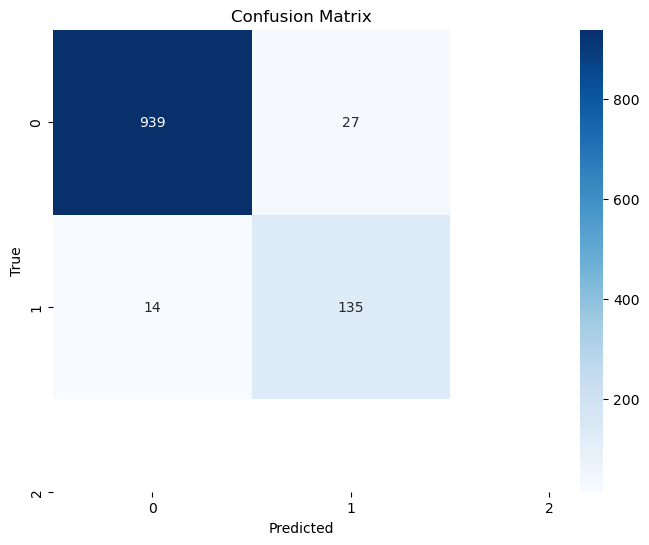

In [19]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Tính confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Hiển thị confusion matrix bằng heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9632286995515695
Precision: 0.965000619552448
Recall: 0.9632286995515695
F1 Score: 0.9638726805107826


In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

X_train_2, X_test_2, y_train, y_test = train_test_split(X_raw, y, test_size=0.2, random_state=42)


vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train_2)
X_test_vectorized = vectorizer.transform(X_test_2)

# Xây dựng mô hình Logistic Regression
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

# Dự đoán trên tập kiểm tra
y_pred_2 = model.predict(X_test_vectorized)

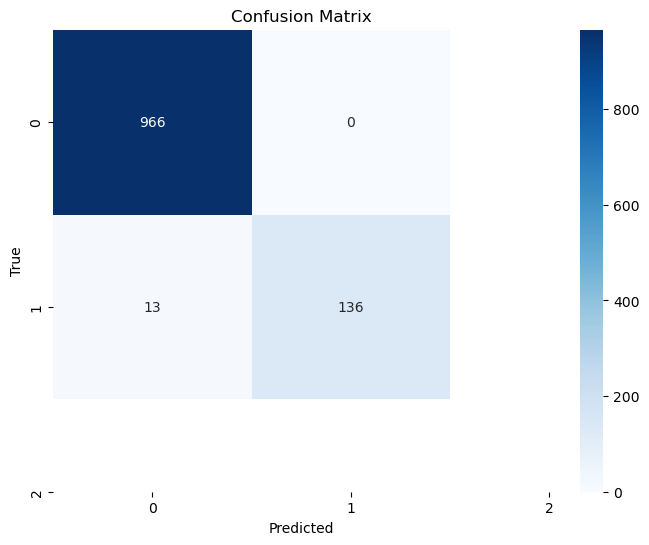

In [28]:
cm = confusion_matrix(y_test, y_pred_2)

# Hiển thị confusion matrix bằng heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
# Tot nhat trong tat ca

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train_2)
X_test_tfidf = vectorizer.transform(X_test_2)

# Xây dựng mô hình Logistic Regression
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Dự đoán trên tập kiểm tra
y_pred_3 = model.predict(X_test_tfidf)


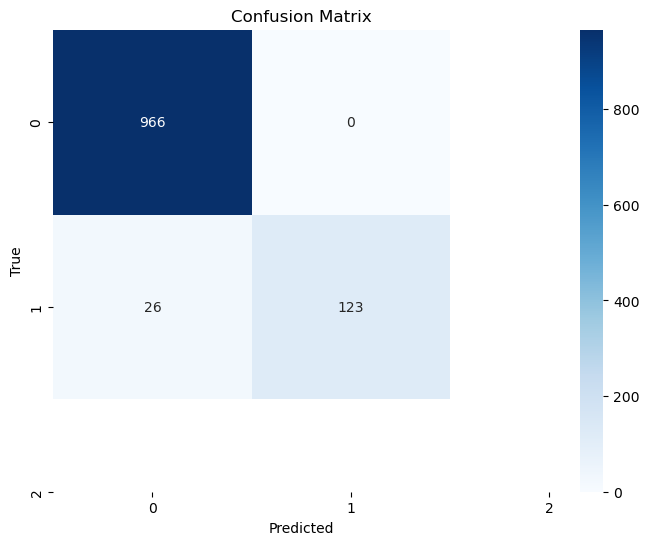

In [32]:
cm = confusion_matrix(y_test, y_pred_3)

# Hiển thị confusion matrix bằng heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
# Tot hon so voi BN nhung kem hon so voi CountVectorizer